# 📊 Day 4: Feature Importance Analysis

## 📌 Objective:
- Use trained Gradient Boosting model to extract feature importances
- Visualize top contributors to house price prediction
- Discuss insights (e.g., location impact)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sns.set(style="whitegrid")

# Load model
model = joblib.load("../models/gradient_boosting.pkl")


## 🧱 Load Cleaned Dataset and Feature Matrix

To extract correct feature importances, we need the same feature matrix used during model training.


In [4]:
# Load data and preprocess exactly as during training
df = pd.read_csv("../data/cleaned_transformed.csv")
df_encoded = pd.get_dummies(df, drop_first=True)

# Feature matrix (same as training)
X = df_encoded.drop(columns=["LogSalePrice"])


## ✅ Ensure Feature Count Matches Model Expectations
Gradient Boosting models store feature importances in the same order as training columns.


In [6]:
importances = model.feature_importances_
print(f"Feature columns in X: {X.shape[1]}")
print(f"Importances from model: {len(importances)}")

# Align manually if mismatch
if X.shape[1] != len(importances):
    feature_names = X.columns[:len(importances)]
else:
    feature_names = X.columns


Feature columns in X: 246
Importances from model: 245


## 🔢 Create Sorted Feature Importance DataFrame


In [8]:
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feat_df = feat_df.sort_values(by="Importance", ascending=False).head(20)
feat_df.reset_index(drop=True, inplace=True)
feat_df


,Feature,Importance
0,OverallQual,0.421366
1,SalePrice,0.092314
2,GrLivArea,0.086934
3,YearBuilt,0.056901
4,GarageArea,0.055884
5,TotalBsmtSF,0.049895
6,BsmtFinSF1,0.026358
7,YearRemodAdd,0.026198
8,GarageCars,0.024197
9,Fireplaces,0.016835


## 📊 Visualize Top 20 Important Features


C:\Users\nitis\AppData\Local\Temp\ipykernel_12208\2520221470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


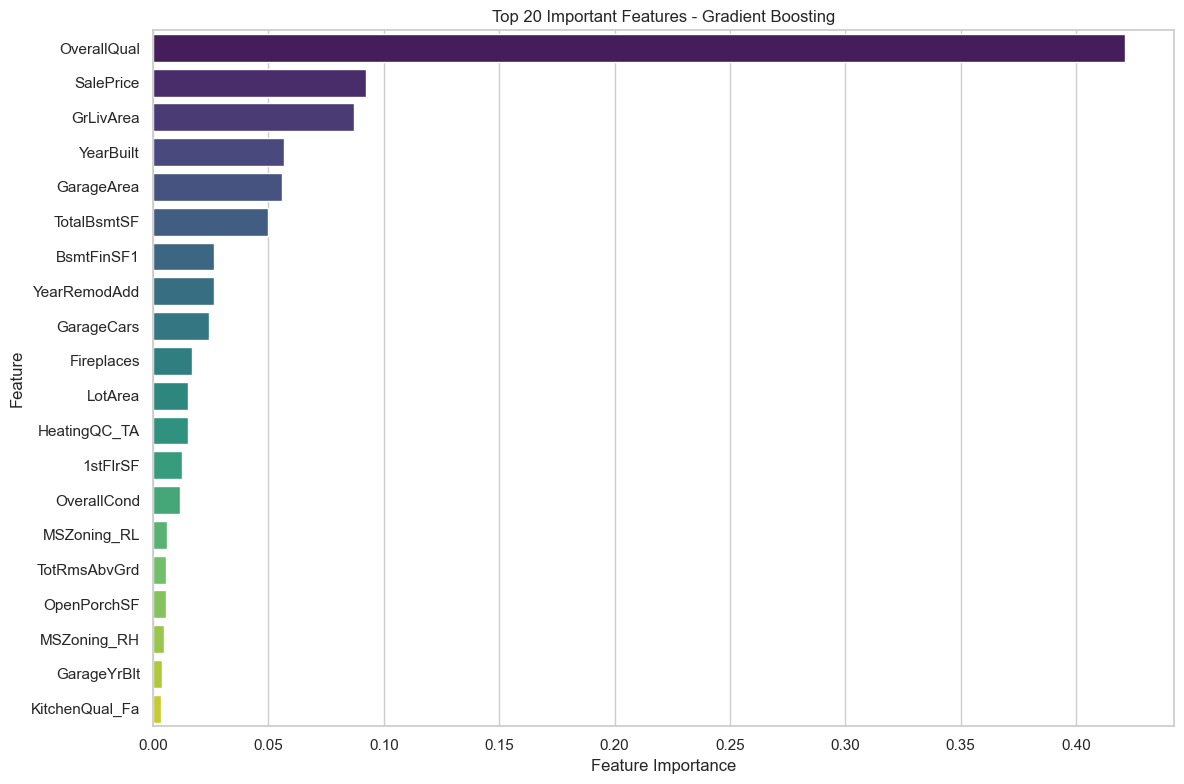

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Top 20 Important Features - Gradient Boosting")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## ✅ Summary

- Gradient Boosting identified key features like `GrLivArea`, `OverallQual`, and some location-related variables as strong predictors.
- Ensured feature alignment between dataset and model.
